In [15]:
from main_res_clf import KeyStrokeClsDataset
import imageio
import numpy as np
from IPython.display import Image

train_dataset = KeyStrokeClsDataset("key_clf_data", 'train')

In [16]:
train_dataset.class_counts

{'BackSpace': 4141,
 'Comma': 452,
 'Space': 6703,
 'Stop': 304,
 'a': 2929,
 'b': 568,
 'c': 1208,
 'd': 1163,
 'e': 4370,
 'f': 648,
 'g': 691,
 'h': 1161,
 'i': 2809,
 'j': 345,
 'k': 294,
 'l': 1592,
 'm': 827,
 'n': 2360,
 'o': 2498,
 'p': 908,
 'q': 279,
 'r': 2256,
 's': 1837,
 't': 2834,
 'u': 1408,
 'v': 375,
 'w': 524,
 'x': 431,
 'y': 733,
 'z': 388}

In [17]:
len(train_dataset)

47036

In [18]:
id2Label = ['BackSpace', 'Comma', 'Space', 'Stop', 
            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 
            'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
            'y', 'z']

In [24]:
video, label = train_dataset[1]
print("Label:", id2Label[label])
print("Video shape:", video.shape)
video

Label: r
Video shape: torch.Size([3, 8, 320, 320])


tensor([[[[0.9059, 0.9098, 0.8980,  ..., 0.3804, 0.3765, 0.3725],
          [0.9059, 0.9059, 0.8941,  ..., 0.3686, 0.3765, 0.3765],
          [0.8980, 0.8980, 0.8863,  ..., 0.3647, 0.3725, 0.3686],
          ...,
          [0.4431, 0.4392, 0.4275,  ..., 0.2000, 0.1843, 0.1373],
          [0.4431, 0.4431, 0.4314,  ..., 0.2000, 0.1843, 0.1373],
          [0.4431, 0.4510, 0.4353,  ..., 0.1922, 0.1804, 0.1451]],

         [[0.9098, 0.9137, 0.9020,  ..., 0.3922, 0.3725, 0.3843],
          [0.9098, 0.9098, 0.8980,  ..., 0.3686, 0.3647, 0.3804],
          [0.9020, 0.9020, 0.8941,  ..., 0.3569, 0.3529, 0.3647],
          ...,
          [0.4510, 0.4353, 0.4235,  ..., 0.1882, 0.1804, 0.1569],
          [0.4510, 0.4392, 0.4275,  ..., 0.1882, 0.1804, 0.1569],
          [0.4510, 0.4431, 0.4314,  ..., 0.1843, 0.1804, 0.1608]],

         [[0.9098, 0.9137, 0.9020,  ..., 0.3843, 0.3804, 0.3843],
          [0.9098, 0.9098, 0.8980,  ..., 0.3686, 0.3804, 0.3922],
          [0.9020, 0.9020, 0.8941,  ..., 0

In [20]:
# permute to (num_channels, num_frames, height, width)
vframes = video.permute(3, 0, 1, 2)
vframes.shape

torch.Size([320, 3, 8, 320])

In [27]:
def create_gif(video_tensor, filename="sample.gif"):
    """
    Prepares a GIF from a video tensor.
    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """

    kargs = {"duration": 0.25}
    imageio.mimsave(filename, video_tensor, "GIF", **kargs)
    return filename

gif_filename = create_gif((video.permute(1, 2, 3, 0).numpy()*255).astype(np.uint8), 'sample.gif')

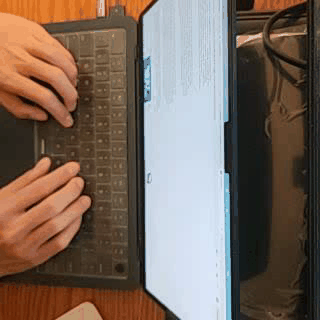

In [46]:
Image(filename=gif_filename)